In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Laden Sie die Daten
df = pd.read_csv('candy-data.csv')

## Explorative Datenanalyse

In [3]:
# Die ersten Zeilen und Basisinformationen anzeigen
print(df.head())
print("\
Dataset Info:")
print(df.info())

  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  
Dataset Info:
<class 'pandas.core.fram

In [8]:
# Auf fehlende Werte prüfen
print("\
Missing Values:")
print(df.isnull().sum())

Missing Values:
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


Die meisten Spalten (oder Merkmale, Variablen) sind binär und geben das Vorhandensein oder Fehlen bestimmter Geschmackseigenschaften an. Es gibt keine fehlenden Werte, sodass keine weitere Datenbereinigung erforderlich ist.

Durch Sortieren der Süßigkeiten nach ihrem 'winpercent' werden die am besten bewerteten Süßigkeiten in absteigender Reihenfolge angezeigt.

In [23]:
df.sort_values("winpercent", ascending=False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [4]:
# Zusammenfassende Statistiken anzeigen
print("\
Summary Statistics:")
print(df.describe())

Summary Statistics:
       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.000000   0.000000   
50%     0.000000   0.000000   0.000000        0.000000   0.000000   
75%     1.000000   1.000000   0.000000        0.000000   0.000000   
max     1.000000   1.000000   1.000000        1.000000   1.000000   

       crispedricewafer       hard        bar   pluribus  sugarpercent  \
count         85.000000  85.000000  85.000000  85.000000     85.000000   
mean           0.082353   0.176471   0.247059   0.517647      0.478647   
std            0.276533   0.383482   0.433861   0.502654      0.282778   
min            0.000000   0.000000   0.000000   0.000000      

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


## Produktanalyse-Korrelation

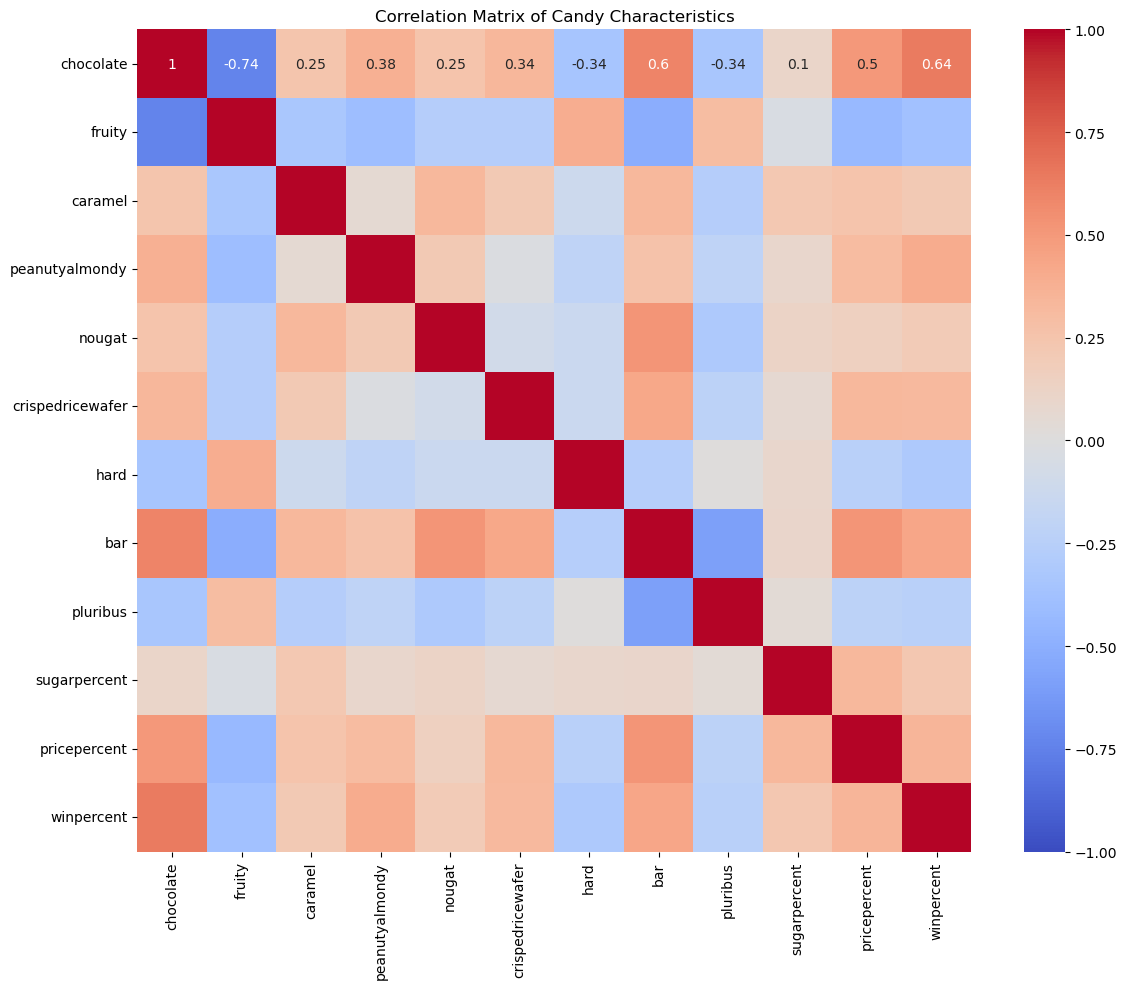

Correlation matrix has been saved as 'correlation_heatmap.png'
Correlations with Win Percentage:
winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
pricepercent        0.345325
crispedricewafer    0.324680
sugarpercent        0.229151
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64


In [5]:
# Korrelationsmatrix erstellen
corr_matrix = df.drop('competitorname', axis=1).corr()

# Erstellen Sie eine Heatmap der Korrelationsmatrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Candy Characteristics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

print("Correlation matrix has been saved as 'correlation_heatmap.png'")

# Korrelationen mit Winpercent anzeigen
win_corr = corr_matrix['winpercent'].sort_values(ascending=False)
print("\
Correlations with Win Percentage:")
print(win_corr)

## Erkenntnisse auf den ersten Blick

- **Schokolade** weist die stärkste positive Korrelation (**0,64**) mit der Beliebtheit auf.

- **Riegelformat** (**0,43**) und **Erdnuss-/Mandelgehalt** (**0,41**) weisen ebenfalls moderate positive Korrelationen auf.

- **Preisprozentsatz** (**0,35**) und **knusprige Reiswaffeln** (**0,32**) weisen schwache bis moderate positive Korrelationen auf.

- **Fruchtig** (**-0,38**) und **Hartbonbons** (**-0,31**) weisen moderate negative Korrelationen mit der Beliebtheit auf.


- Wenn ein Bonbon „fruchtig“ ist, ist es normalerweise nicht „Schokolade“, „Karamell“, „Erdnuss-Mandel“, „Nougat“, „Knusper-Reiswaffel“, „Riegel“.
- Wenn ein Bonbon ein „Riegel“ ist, ist es normalerweise nicht einer von vielen in einer Tüte oder Schachtel („Pluribus“).
- Der „Gewinnprozentsatz“ korreliert mit „Schokolade“ und ist antikorreliert mit „fruchtig“.
- Der „Zuckerprozentsatz“ zeigt wenig Korrelation mit irgendwelchen Merkmalen (abgesehen von „Preisprozentsatz“ und „Gewinnprozentsatz“).
- „Fruchtige“, „harte“ und „Pluribus“-Bonbons zeigen im Allgemeinen einen niedrigen „Gewinnprozentsatz“.





### Ich wollte fortfahren und zwei Methoden wählen, um das beste Verhältnis für diese Studie zu finden.

## Vergleich zweier statistischer Methoden

In [6]:
# # Daten vorbereiten
X = df.drop(['competitorname', 'winpercent'], axis=1)
y = df['winpercent']

In [7]:
# Aufteilen der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(68, 11)

In [9]:
X_test.shape

(17, 11)

In [10]:
y_train.shape

(68,)

In [11]:
y_test.shape

(17,)

In [12]:
# Lineare Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.fit(X_train, y_train).predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [13]:
lr_pred

array([42.1057203 , 67.00810906, 40.64255193, 51.49734157, 39.15244708,
       41.8596323 , 62.99202094, 42.72689597, 50.85926701, 40.26802985,
       62.61342688, 62.50389937, 51.42432092, 45.13346846, 42.14520535,
       70.37380867, 56.07391278])

In [14]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [15]:
rf_pred

array([45.79489696, 67.91131923, 43.34814499, 44.74435207, 44.17892628,
       44.86539039, 64.8305722 , 45.58676686, 45.6727179 , 45.66555204,
       57.55224632, 72.60648692, 54.72437104, 43.084185  , 30.85497009,
       73.41274766, 62.59025067])

In [16]:
print("Linear Regression Results:")
print(f"Mean Squared Error: {lr_mse:.4f}")
print(f"R-squared Score: {lr_r2:.4f}")

Linear Regression Results:
Mean Squared Error: 160.9830
R-squared Score: 0.1970


In [17]:
print("\
Random Forest Regression Results:")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R-squared Score: {rf_r2:.4f}")

Random Forest Regression Results:
Mean Squared Error: 142.0568
R-squared Score: 0.2914


In [18]:
# Merkmalsbedeutung für Random Forest
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\
Random Forest Feature Importance:")
print(feature_importance)

Random Forest Feature Importance:
             feature  importance
0          chocolate    0.439130
9       sugarpercent    0.186829
10      pricepercent    0.154064
3     peanutyalmondy    0.058308
7                bar    0.046858
5   crispedricewafer    0.026651
1             fruity    0.026245
8           pluribus    0.021285
2            caramel    0.020621
6               hard    0.011738
4             nougat    0.008270


In [21]:
# vergleich der Features mit Top(10) Süßigkeiten
df.nlargest(10, "winpercent")

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


# Vergleich statistischer Methoden

Wir haben zwei Methoden verwendet, um die Beliebtheit von Süßigkeiten vorherzusagen: **Lineare Regression** und **Random Forest Regression**.

### Ergebnisse der linearen Regression:
- **Mittlerer quadratischer Fehler**: 160,9830
- **R-Quadrat-Wert**: 0,1970

### Ergebnisse der Random Forest Regression:
- **Mittlerer quadratischer Fehler**: 142,0568
- **R-Quadrat-Wert**: 0,2914

Das **Random Forest**-Modell schnitt mit einem niedrigeren mittleren quadratischen Fehler und einem höheren R-Quadrat-Wert besser ab. Dies deutet darauf hin, dass die Beziehung zwischen Süßigkeiteneigenschaften und Beliebtheit komplex und nicht linear ist.

## Empfehlungen für eine neue Süßigkeitenmarke

Based on the analysis, here are recommendations for creating a new sweet brand for Lidl:

a. Focus on Chocolate: The strongest predictor of popularity is chocolate. Consider developing a chocolate-based candy as your primary option.

b. Bar Format: Bar-shaped candies are positively correlated with popularity. A chocolate bar could be a good choice.

c. Peanut or Almond Inclusion: Adding peanuts or almonds to the candy could increase its appeal, as this feature is positively correlated with popularity.

d. Sugar and Price Balance: While sugar content and price are important factors, they're not the top predictors of popularity. Aim for a moderate sugar content and competitive pricing.

e. Consider Texture: Crispy rice wafers have a slight positive correlation with popularity. You could incorporate this texture into your chocolate bar for added appeal.

f. Avoid Certain Features: Steer clear of making the candy primarily fruity or hard, as these characteristics are negatively correlated with popularity.

Proposed Concept: "Lidl's Crispy Delight"

A chocolate bar with a crispy rice wafer core, featuring small pieces of almonds or peanuts throughout. The bar should be segmented for easy sharing (addressing the slight negative correlation with 'pluribus' or multiple pieces per package). Aim for a moderate sugar content and competitive pricing to balance taste and value.

This concept combines the most popular features (chocolate, bar shape, nuts) with an appealing texture (crispy wafer) while avoiding less popular characteristics (fruity, hard). It also allows for flexibility in production and potential variations (e.g., dark chocolate version, seasonal nut changes) to expand the product line in the future.

Basierend auf der Analyse sind hier Empfehlungen für die Entwicklung einer neuen Süßigkeitenmarke für Lidl:

a. Fokus auf Schokolade: Der stärkste Indikator für Beliebtheit ist Schokolade. Erwägen Sie die Entwicklung einer Süßigkeit auf Schokoladenbasis als Ihre primäre Option.

b. Riegelformat: Riegelförmige Süßigkeiten korrelieren positiv mit Beliebtheit. Ein Schokoriegel könnte eine gute Wahl sein.

c. Erdnuss- oder Mandelzusatz: Das Hinzufügen von Erdnüssen oder Mandeln zu den Süßigkeiten könnte ihre Attraktivität erhöhen, da diese Eigenschaft positiv mit Beliebtheit korreliert.

d. Zucker- und Preisgleichgewicht: Obwohl Zuckergehalt und Preis wichtige Faktoren sind, sind sie nicht die wichtigsten Indikatoren für Beliebtheit. Streben Sie einen moderaten Zuckergehalt und wettbewerbsfähige Preise an.

e. Berücksichtigen Sie die Textur: Knusprige Reiswaffeln haben eine leicht positive Korrelation mit Beliebtheit. Sie könnten diese Textur in Ihren Schokoriegel einarbeiten, um ihn attraktiver zu machen.

f. Vermeiden Sie bestimmte Eigenschaften: Vermeiden Sie es, die Süßigkeiten hauptsächlich fruchtig oder hart zu machen, da diese Eigenschaften negativ mit Beliebtheit korrelieren.

Vorgeschlagenes Konzept: „Lidls Knuspergenuss“

Ein Schokoriegel mit einem Kern aus knuspriger Reiswaffel, der mit kleinen Mandel- oder Erdnussstückchen überzogen ist. Der Riegel sollte segmentiert sein, damit er leicht geteilt werden kann (um die leicht negative Korrelation mit „Pluribus“ oder mehreren Stücken pro Packung zu berücksichtigen). Streben Sie einen moderaten Zuckergehalt und einen wettbewerbsfähigen Preis an, um Geschmack und Wert in Einklang zu bringen.

Dieses Konzept kombiniert die beliebtesten Eigenschaften (Schokolade, Riegelform, Nüsse) mit einer ansprechenden Textur (knusprige Waffel), während weniger beliebte Eigenschaften (fruchtig, hart) vermieden werden. Es ermöglicht auch Flexibilität bei der Produktion und mögliche Variationen (z. B. dunkle Schokoladenversion, saisonale Nusswechsel), um die Produktlinie in Zukunft zu erweitern.